In [2]:
import pandas as pd

home_data = pd.read_csv('housing.csv', usecols = ['longitude', 'latitude', 'median_house_value'])
home_data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'housing.csv'

# Visualize the Data

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data = home_data, x = 'longitude', y = 'latitude', hue = 'median_house_value')
plt.show()

# Normalize the Data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#Splitting the data set 
X_train, X_test, y_train, y_test = train_test_split(home_data[['latitude', 'longitude']], home_data[['median_house_value']], test_size=0.33, random_state=0)

#Normalizing the training and testing data
X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [1]:
print (X_train_norm)

NameError: name 'X_train_norm' is not defined

# Fitting and Evaluating the the Model

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init=10)
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, random_state=0)

[]

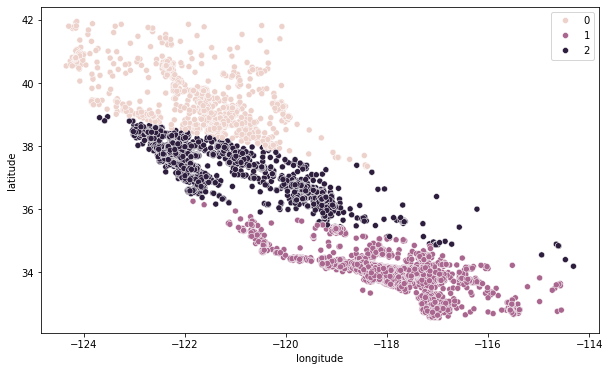

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = kmeans.labels_)
plt.plot()

<Axes: ylabel='median_house_value'>

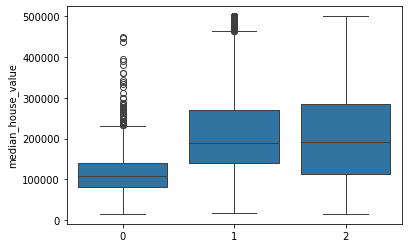

In [20]:
sns.boxplot(x = kmeans.labels_, y = y_train['median_house_value'])

In [21]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

0.7499956340585485

# Choosing the best number of clusters

In [23]:
K = range(2, 8)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init=10).fit(X_train_norm)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

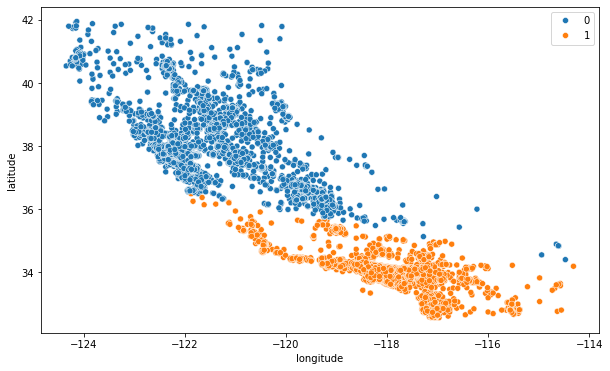

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[0].labels_)
plt.show()

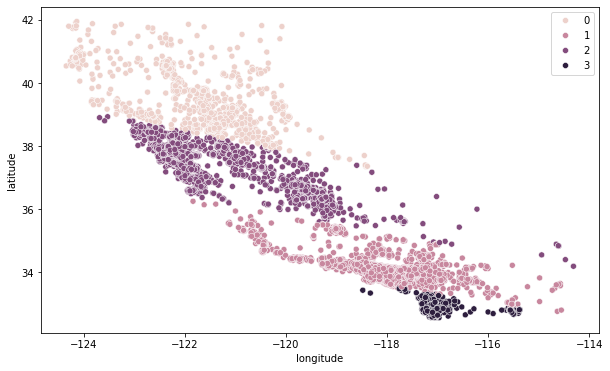

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[2].labels_)
plt.show()

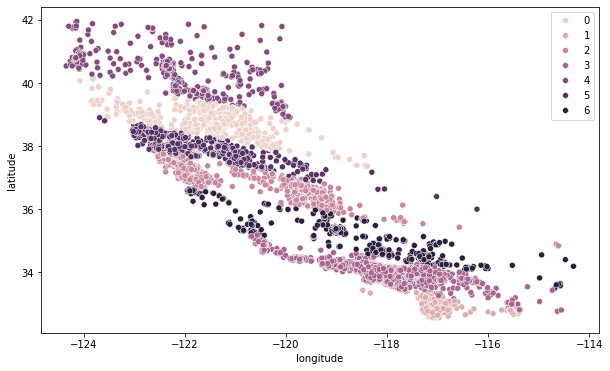

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[5].labels_)
plt.show()

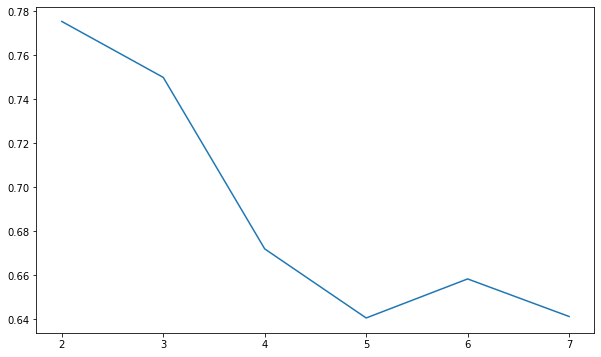

In [40]:
plt.figure(figsize=(10, 6))
sns.lineplot(x = K, y = score)
plt.show()

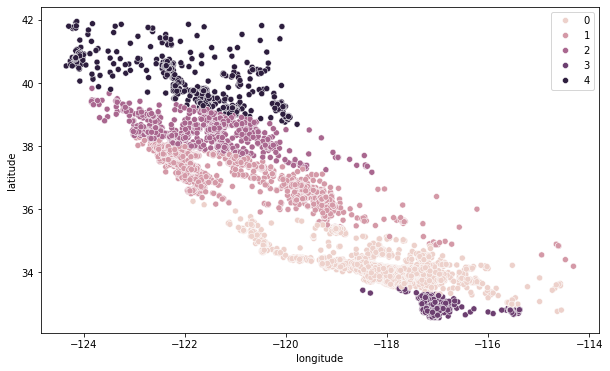

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[3].labels_)
plt.show()

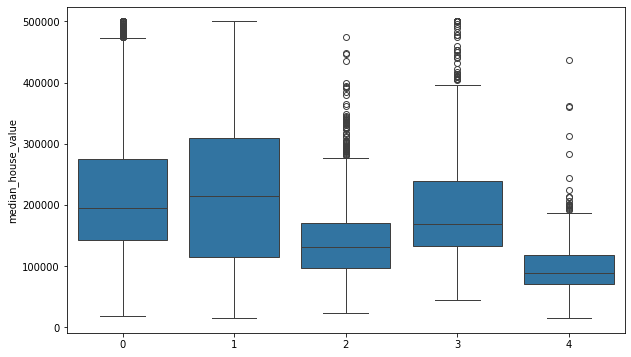

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = fits[3].labels_, y = y_train['median_house_value'])
plt.show()